In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def scalar_value(x):
    return 2*x**2 + 2

In [3]:
nums = np.arange(-10, 10, 0.5)
nums

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

In [4]:
y_nums = scalar_value(nums)
y_nums

array([202. , 182.5, 164. , 146.5, 130. , 114.5, 100. ,  86.5,  74. ,
        62.5,  52. ,  42.5,  34. ,  26.5,  20. ,  14.5,  10. ,   6.5,
         4. ,   2.5,   2. ,   2.5,   4. ,   6.5,  10. ,  14.5,  20. ,
        26.5,  34. ,  42.5,  52. ,  62.5,  74. ,  86.5, 100. , 114.5,
       130. , 146.5, 164. , 182.5])

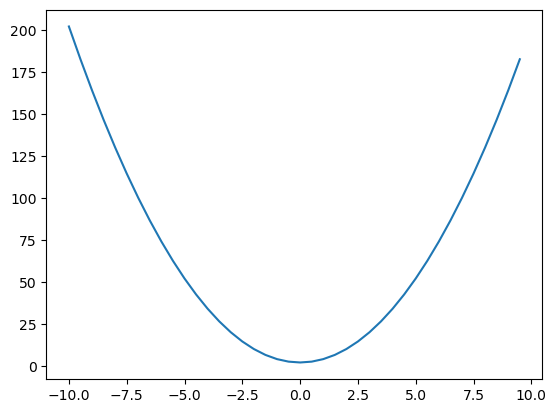

In [5]:
plt.plot(nums, y_nums);

In [6]:
at_5 = scalar_value(5)
at_5

52

In [7]:
def diff(a, h):
    val = (scalar_value(a + h) - scalar_value(a)) / h
    return val

In [8]:
h = 0.00001
z = diff(-5, h)
z

-19.999979999596462

In [9]:
# Getting more complex

h = 0.0001

#inputs
a = 10
b = -2
c = 3

#function
d = a * b + c

#derivate wrt a,b,c

a += h
d1 = a * b + c

#results
print("d : ", d)
print("d after diff: ", d1)
print("slope: ", (d1 - d)/h)


d :  -17
d after diff:  -17.0002
slope:  -1.9999999999953388


In [7]:
# Creating a Value class 
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"

a = Value(10.0)
a

Value(data=10.0)

In [9]:
b = Value(-2)
b

Value(data=-2)

In [11]:
# trying to add these 2 values would result in an error since python doesn't know what addition for Value object is
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [13]:
# Adding addition and multiplication
class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        val = Value(self.data + other.data)
        return val
    def __mul__(self, other):
        val = Value(self.data * other.data)
        return val

a = Value(10.0)
b = Value(-2.0)
c = Value(3.0)

a*b + c

Value(data=-17.0)

In [37]:
# We want to be able to go back from an expression and refer to the children that formed that expression
class Value:
    def __init__(self, data, _children = (), _op = '', label=''): # An empty tuple to store children and an empty string to store prev operation
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # Creating a attribute _prev that contains the set of children
        self._op = _op # Creating the string attribute that tells us the prev operation used
        self.label = label
    def __repr__(self):
        return f"Value(data= {self.data})"
    def __add__(self, other):
        val = Value(self.data + other.data, (self, other), '+')
        return val
    def __mul__(self, other):
        val = Value(self.data * other.data, (self, other), '*')
        return val
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        return out
        
    
a = Value(10.0, label = 'a')
b = Value(-2.0, label = 'b')
c = Value(3.0, label = 'c')

e = a*b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(5.0, label = 'f')

L = d * f
L.label = 'L'

In [3]:
# Graphing this feed forward process 
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr = {"rankdir": "LR"}) #LR = Left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape = 'record')
        if n._op:
            #If this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

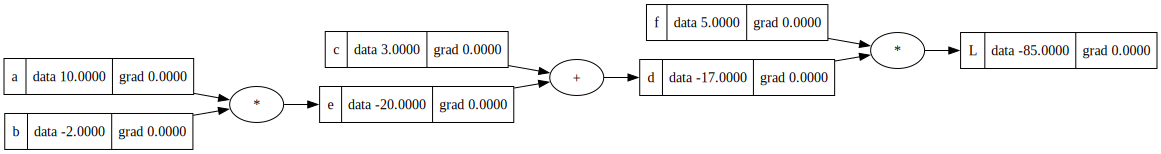

In [19]:
draw_dot(L)

## Manually Doing Backpropogation

The gradient of L should be 1.00
dL/dL = ? (1)
(L+h - L/h) = h/h = 1.00

Now comes the derivate of L in relation to d and f
dL/dd = ? (f)
((d + h) * f) - (d * f) / h = df + fh -df / h = fh/h = f

dL/df = ? (d)

Now it comes to e and c
Through chain rule of caluculus = dL/de = dL/dd * dd/dd 
so therefore we focus on the dd / de and dc
dd/de = e + h + c - e - c / h = h / h = 1.00
dd/dc = c + h + e - c - e / h = h / h = 1.00

dL/de = dL/dd * dd/de = f * 1
dL/dc = dL/dd * dd/dc = f * 1

Now we move on to a and b
Following the chain rule again
de/db = a
de/da = b

dL/db = dL/de * de/db = f * a
dL/da = dL/de * de/da = f * b

Grad values : 

L = 1

d = f = 5

f = d = -17

e = f = 5

c = f = 5

b = fa = 50

a = fb = -10

In [21]:
# Verifying 
def verify():

    # Initial
    a = Value(10.0)
    b = Value(-2.0)
    c = Value(3.0)
    e = a*b
    d = e + c 
    f = Value(5.0)
    L = d * f

    h = 0.001
    # After
    a = Value(10.0)
    b = Value(-2.0)
    c = Value(3.0)
    e = a*b
    e.data += h
    d = e + c 
    f = Value(5.0)
    L1 = d * f

    print("L : ", L)
    print("L1 : ", L1)
    print("slope: ", (L1.data - L.data)/h)


verify()

L :  Value(data= -85.0)
L1 :  Value(data= -84.99499999999999)
slope:  5.000000000009663


In [23]:
# Setting the gradient values
L.grad = 1.00
f.grad = -17.00
d.grad = 5.00
e.grad = 5.00
c.grad = 5.00
b.grad = 50.00
a.grad = -10.00

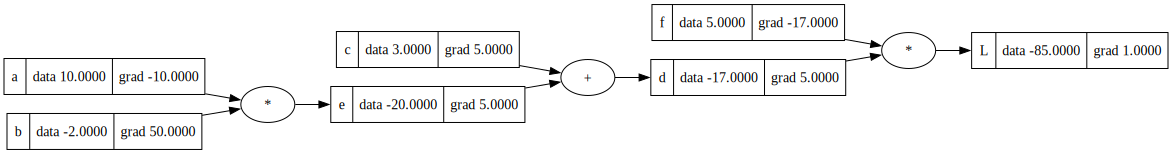

In [25]:
draw_dot(L)

In [27]:
# Single Optimization step
# To increase the value of L by a little

a.data = a.data + (0.001 * a.grad)
b.data += 0.001*b.grad
c.data += 0.001*c.grad
f.data += 0.001*f.grad

# We only change the leaf nodes
e = a*b
d = e + c 
L = d * f
L

Value(data= -82.0974165)

In [47]:
# Backpropogation in one Neuron

# Inputs
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# Weights on the Inputs 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# Bias of the Neuron
b = Value(6.8813735870195, label = "b")

# Weighted input to the neurin X.W
x1w1 = x1 * w1 ; x1w1.label = "x1w1"
x2w2 = x2 * w2 ; x2w2.label = "x2w2"
        
# Weighted sum
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1w1x2w2"

# Final value of the neuron
n = x1w1x2w2 + b ; n.label = "n"

# We need to add an activation function. We will use tanh. We need to implement this function in the Value class
# After creating the function

o = n.tanh() ; o.label = "o"
o

Value(data= 0.7071067811865258)

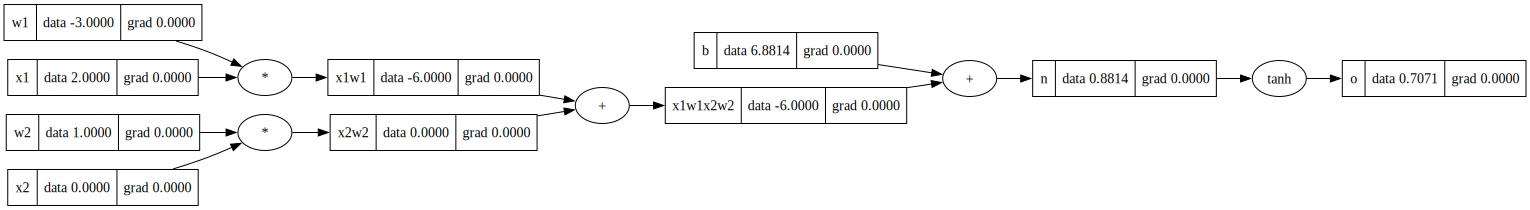

In [49]:
draw_dot(o)

In [59]:
h = 0.00001 
ntemp = Value(n.data + h)
otemp = ntemp.tanh()

(otemp.data - o.data )/ h

0.49999646447584917

In [61]:
o.grad = 1
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
w1.grad = 1
x1.grad = -1.5
w2.grad = 0
x2.grad = 0.5

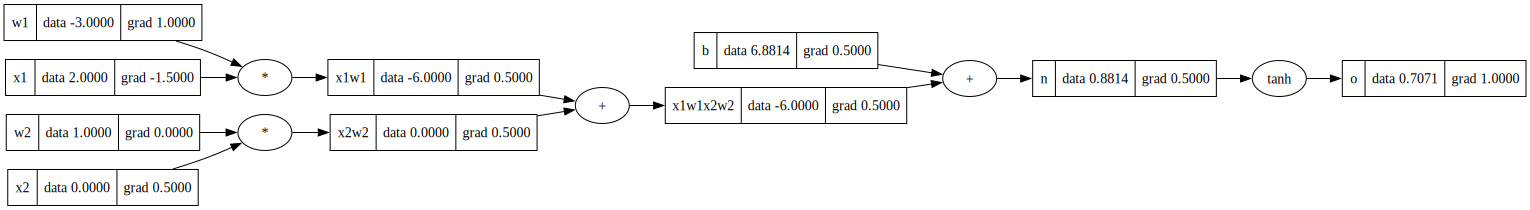

In [65]:
draw_dot(o) # We see that w2 is useless for now, so to increase the output 'o' we would need to increase w1, and it would increase o 1-to-one

In [ ]:
# Now this is dumb since we're solving the grads ourselves. So now we do it automatically

In [27]:
class Value:
    def __init__(self, data, _children = (), _op = '', label=''): # An empty tuple to store children and an empty string to store prev operation
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # Creating a attribute _prev that contains the set of children
        self._op = _op # Creating the string attribute that tells us the prev operation used
        self.label = label
        self._backward = lambda : None #This is a function whose value is none by default
     
    def __repr__(self):
        return f"Value(data= {self.data})"
        
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
            self._backward()
            other._backward()
        out._backward = _backward # This says that when out._backward is run, the current _backward function definition runs.
        return out               # So when out._backward() runs the current grad (self, other) values are instantiated.
            
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
            self._backward()
            other._backward()
        out._backward = _backward
        return out
        
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        def _backward():
            self.grad += out.grad * (1 - t**2)
            self._backward()
        out._backward = _backward
        return out

    def backward(self):
        self.grad = 1.0
        self._backward()
        

In [5]:
# Inputs
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# Weights on the Inputs 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")
# Bias of the Neuron
b = Value(6.8813735870195, label = "b")
# Weighted input to the neuron X.W
x1w1 = x1 * w1 ; x1w1.label = "x1w1"
x2w2 = x2 * w2 ; x2w2.label = "x2w2"      
# Weighted sum
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1w1x2w2"
# Final value of the neuron
n = x1w1x2w2 + b ; n.label = "n"
# Activation Function
o = n.tanh() ; o.label = "o"
o

Value(data= 0.7071067811865258)

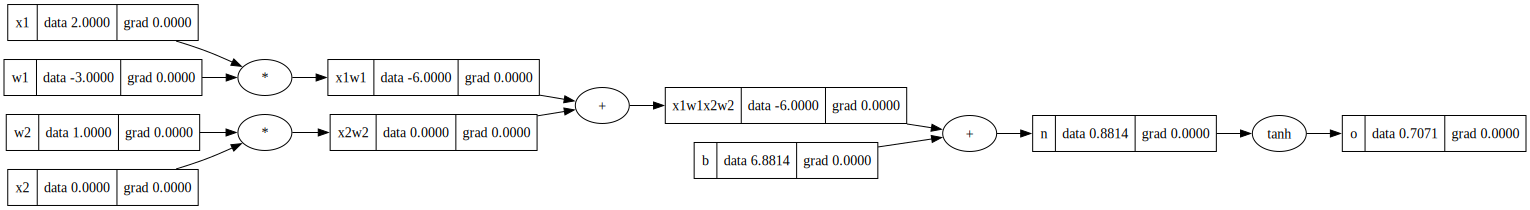

In [11]:
draw_dot(o)

In [131]:
o.grad = 1.00 # By default value of grad is 0. so we must specify this before backpropogating

In [137]:
o._backward()
n._backward()

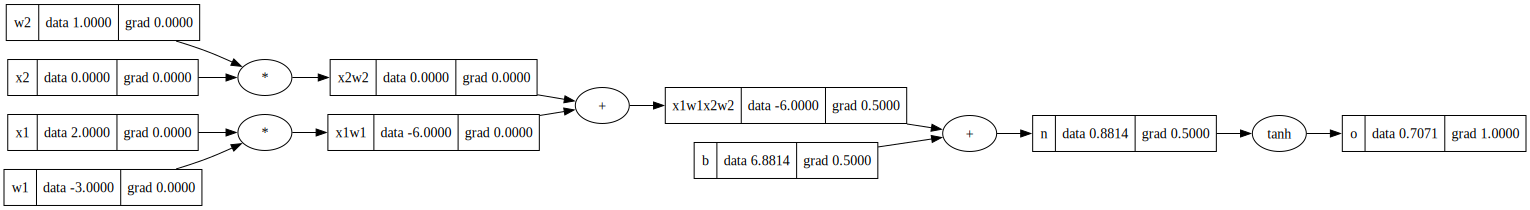

In [139]:
draw_dot(o)

In [141]:
x1w1x2w2._backward()
b._backward() # This won't really do anything since b is a leaf node and it's _backward is a None function
x2w2._backward()
x1w1._backward()
w2._backward() #useless
x2._backward() #useless
x1._backward() #useless
w1._backward() #useless

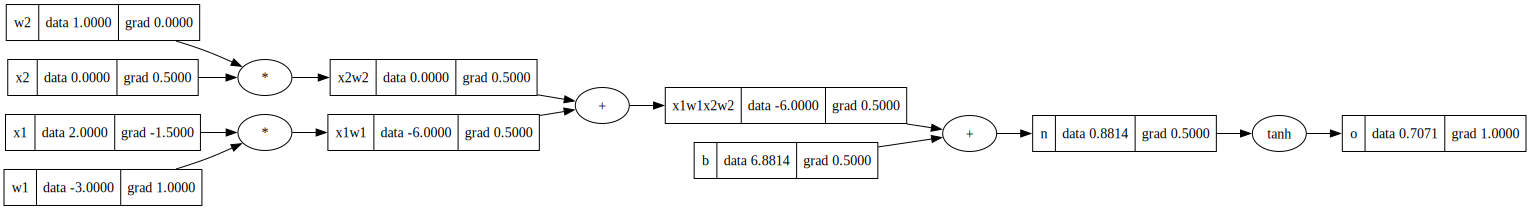

In [143]:
draw_dot(o)

In [13]:
# Now we just need to make sure that we don't call each _backward manually
# So we change Value class to contain ._backward() calls in its function definitions
o.grad = 1
o._backward()

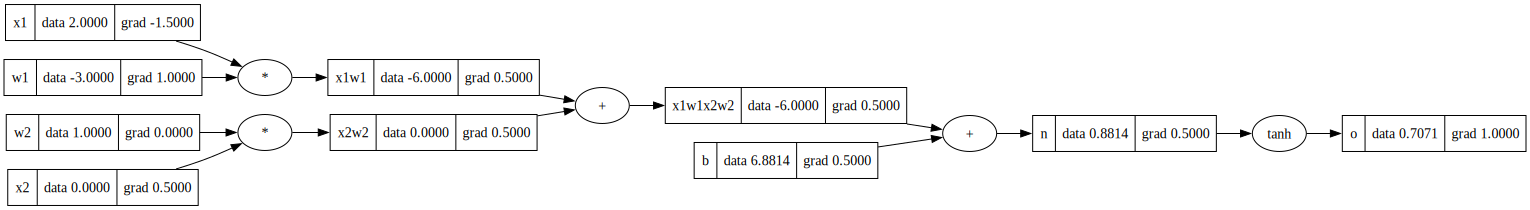

In [17]:
draw_dot(o)

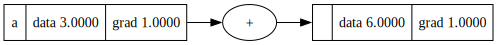

In [25]:
# Right now there is a bug when you use one variable more than once
a = Value(3.0, label = "a")
b = a + a # The grad should be 2.0
b.backward()
draw_dot(b)

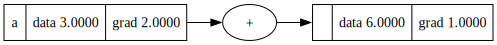

In [29]:
# To Change this we add grad each time instead of assigning
a = Value(3.0, label = "a")
b = a + a # The grad should be 2.0
b.backward()
draw_dot(b)

In [19]:
# We now break tanh into its non composite form : (e^(2x)-1)/(e^(2x) + 1)

class Value:
    def __init__(self, data, _children = (), _op = '', label=''): # An empty tuple to store children and an empty string to store prev operation
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # Creating a attribute _prev that contains the set of children
        self._op = _op # Creating the string attribute that tells us the prev operation used
        self.label = label
        self._backward = lambda : None #This is a function whose value is none by default
     
    def __repr__(self):
        return f"Value(data= {self.data})"
        
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
            self._backward()
            other._backward()
        out._backward = _backward # This says that when out._backward is run, the current _backward function definition runs.
        return out               # So when out._backward() runs the current grad (self, other) values are instantiated.

    def __radd__(self, other):
        return self + other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
            self._backward()
            other._backward()
        out._backward = _backward
        return out
        
    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Right now only supporting float or int powers"
        out = Value(self.data ** other, (self,), "pow")
        def _backward():
            self.grad += other * (self.data**(other - 1)) * out.grad
        out._backward = _backward
        return out
        
    def exp(self):
        n = self.data
        out = Value(math.exp(n), (self,), "exp")
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
        
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp(2*n) + 1)
        out = Value(t, (self, ), "tanh")
        def _backward():
            self.grad += out.grad * (1 - t**2)
            self._backward()
        out._backward = _backward
        return out

    # def backward(self):
    #     self.grad = 1.0
    #     self._backward()

    def backward(self):

        # topological order all of the children in the graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward()
        

In [21]:
# Inputs
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")
# Weights on the Inputs 
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")
# Bias of the Neuron
b = Value(6.8813735870195, label = "b")
# Weighted input to the neuron X.W
x1w1 = x1 * w1 ; x1w1.label = "x1w1"
x2w2 = x2 * w2 ; x2w2.label = "x2w2"      
# Weighted sum
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = "x1w1x2w2"
# Final value of the neuron
n = x1w1x2w2 + b ; n.label = "n"
# Activation Function
o = n.tanh()
o.label = "o"
o.backward()
o

Value(data= 0.7071067811865258)

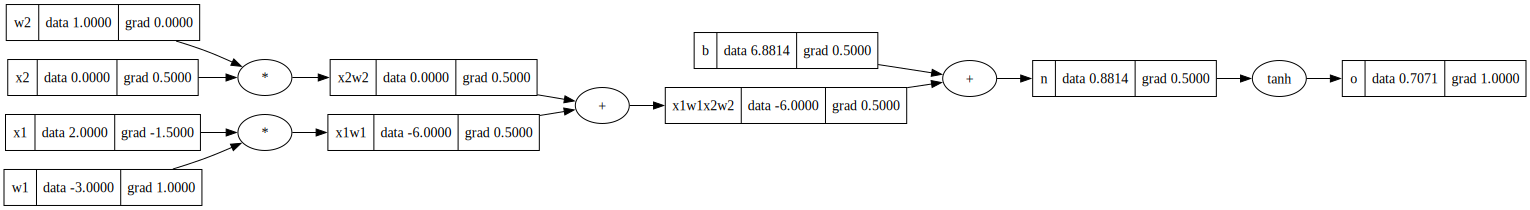

In [23]:
draw_dot(o)

In [25]:
# Doing the same with Pytorch
import torch

In [33]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True # By default tensor value is float32 so we make it float64
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195]); b.requires_grad = True

n = (x1 * w1) + (x2 * w2) + b
o = torch.tanh(n)
print(f"The value of O is : {o.data.item()}")

The value of O is : 0.7071066904050358


In [41]:
o.backward()
print(f"x1: {x1.grad}")
print(f"x2: {x2.grad}")
print(f"w1: {w1.grad}")
print(f"w2: {w2.grad}")

x1: tensor([-1.5000], dtype=torch.float64)
x2: tensor([0.5000], dtype=torch.float64)
w1: tensor([1.0000], dtype=torch.float64)
w2: tensor([0.], dtype=torch.float64)
